In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

# 6.2 주요 레이어 정리

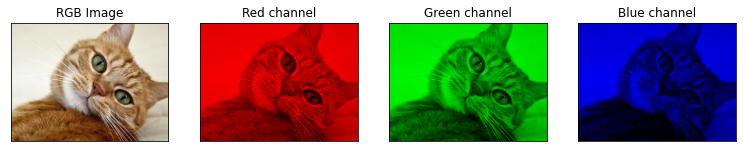

In [2]:
# 그림 6.8 출력 코드. 참고 링크 : https://stackoverflow.com/a/37435090/2689257
import matplotlib.pyplot as plt

image_path = tf.keras.utils.get_file('cat.jpg', 'http://bit.ly/33U6mH9')
image = plt.imread(image_path)

titles = ['RGB Image', 'Red channel', 'Green channel', 'Blue channel']
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

from numpy import array, zeros_like
def channel(image, color):
    if color not in (0, 1, 2): return image
    c = image[..., color]
    z = zeros_like(c)
    return array([(c, z, z), (z, c, z), (z, z, c)][color]).transpose(1,2,0)
  
colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    ax.imshow(channel(image, color))
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [3]:
# 6.1 Conv2D 레이어 생성 코드
conv1 = tf.keras.layers.Conv2D(
    kernel_size = (3, 3), #make filter matrix
    filters=16,
    padding = 'valid', # valid --->크기 신경 안씀.. 줄어들어도 노 상관 # same --->크기 유지(=패딩쓰자)
    strides=(2,2)                    
    
 ) 


In [4]:
# 6.2 MaxPool2D 레이어 생성 코드
pool1 = tf.keras.layers.MaxPool2D(
    pool_size = (2,2),
    strides=(2,2)
)

In [5]:
# 6.3 Dropout 레이어 생성 코드
pool1 = tf.keras.layers.Dropout(rate=0.3)

# 6.3 Fashion MNIST with CNN

In [6]:
# 6.4 Fashion MNIST 데이터셋 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X/255
test_X = test_X/255

In [7]:
train_X.shape

(60000, 28, 28)

In [8]:
train_X[0].shape

(28, 28)

참고 : reshape에서 -1의 사용법 --> 고정된 상태에서 남은 것을 유동적으로
<img src="img/img_19.png">

In [9]:
# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1) # 가로 28, 세로 28, 채널 축 1(60000, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1) #(10000, 28, 2, 1)

# reshape 이후
print(train_X.shape, test_X.shape) 

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


<img src="img/img_21.png">

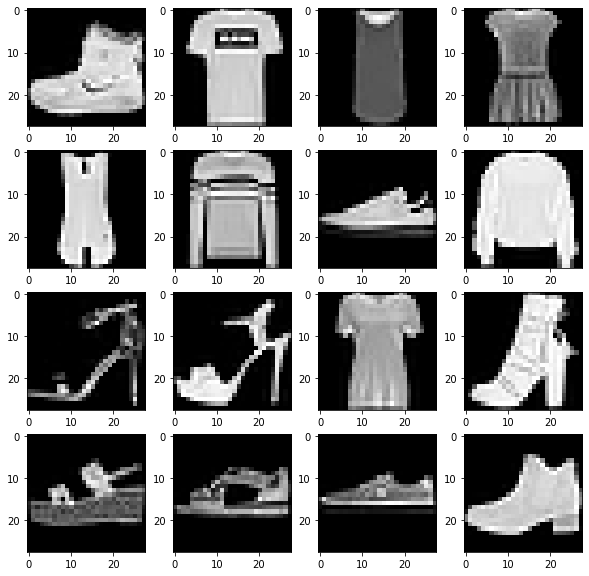

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [10]:
# 6.6 데이터 확인
import matplotlib.pyplot as plt
# 전체 그래프의 사이즈를 width=10, height=10 으로 지정합니다.
plt.figure(figsize=(10, 10))
for c in range(16):
    # 4행 4열로 지정한 grid 에서 c+1 번째의 칸에 그래프를 그립니다. 1~16 번째 칸을 채우게 됩니다.
    plt.subplot(4,4,c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

# train 데이터의 첫번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[:16])

In [11]:
# 6.7 Fashion MNIST 분류 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential(
    [
        # conv레이어 설계 -> 특징들 추출
        tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=16), #filter : (3,3)의 갯수
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
        # 분류 NN을 하기 위해 평탄화 작업
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation='relu'),
        # 출력단 설계,,,,,, 분류가 10개 종류
        tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [12]:
history = model.fit(train_X, train_Y, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 46s 33ms/step - loss: 0.4584 - accuracy: 0.8377 - val_loss: 0.3904 - val_accuracy: 0.8588
Epoch 2/5
1407/1407 [==============================] - 44s 32ms/step - loss: 0.3333 - accuracy: 0.8780 - val_loss: 0.3668 - val_accuracy: 0.8689
Epoch 3/5
1407/1407 [==============================] - 45s 32ms/step - loss: 0.2808 - accuracy: 0.8952 - val_loss: 0.3894 - val_accuracy: 0.8675
Epoch 4/5
1407/1407 [==============================] - 45s 32ms/step - loss: 0.2399 - accuracy: 0.9117 - val_loss: 0.3973 - val_accuracy: 0.8691
Epoch 5/5
1407/1407 [==============================] - 44s 31ms/step - loss: 0.2060 - accuracy: 0.9233 - val_loss: 0.4518 - val_accuracy: 0.8647


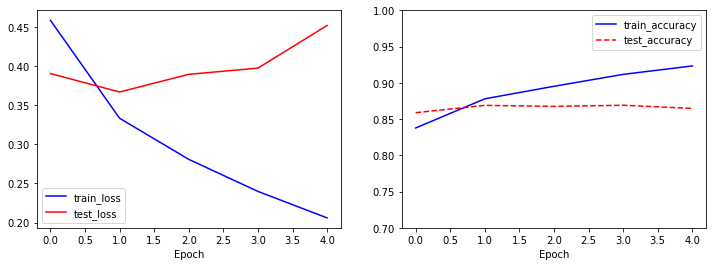

313/313 [==============================] - ETA: 0s - loss: 0.4688 - accuracy: 0.86 - 2s 6ms/step - loss: 0.4695 - accuracy: 0.8623


[0.46954482793807983, 0.8622999787330627]

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r-', label='test_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='test_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)
# 모델이 좋지 않다!!!!! 

Overfitting이 이루어진 것을 볼 수 있음--> val은 성능이 나빠짐;;;;;;train만 좋아지고 있음..
<img src="img/img_22.png">

# 위에서 pooling 과정추가

In [14]:
# 6.10 Fashion MNIST 분류 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드랍아웃 레이어 추가
model = tf.keras.Sequential(
    [
        
        tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=16), #filter : (3,3)의 갯수
        tf.keras.layers.MaxPool2D(strides=(2,2)), # 사이즈가 반으로 줄어듬. 
        
        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
        tf.keras.layers.MaxPool2D(strides=(2,2)), # 사이즈가 반으로 줄어듬. 

        tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        
        tf.keras.layers.Dense(units=10, activation='softmax')
    ]
)

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Epoch 1/5
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5456 - accuracy: 0.8023 - val_loss: 0.4085 - val_accuracy: 0.8465
Epoch 2/5
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3694 - accuracy: 0.8643 - val_loss: 0.3350 - val_accuracy: 0.8750
Epoch 3/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3245 - accuracy: 0.8827 - val_loss: 0.3199 - val_accuracy: 0.8809
Epoch 4/5
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2942 - accuracy: 0.8937 - val_loss: 0.3156 - val_accuracy: 0.8847
Epoch 5/5
1407/1407 [==============================] - 8s 5ms/step - loss: 0.2751 - accuracy: 0.8987 - val_loss: 0.3013 - val_accuracy: 0.8901


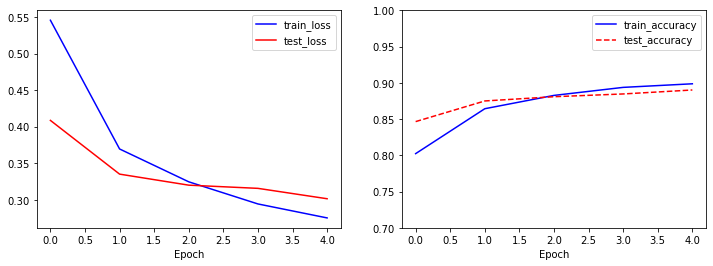

313/313 [==============================] - 1s 3ms/step - loss: 0.3072 - accuracy: 0.8897


[0.3072498142719269, 0.8896999955177307]

In [15]:
# 6.11 Fashion MNIST 분류 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드랍아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs=5, validation_split=0.25)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r-', label='test_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='test_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)

<img src="img/img_23.png">

# 6.4 퍼포먼스 높이기 : 대표적인 방법이    
    - 레이어 더 쌓기 or 보상 구조 추가 등
    - 이미지 보강 : Image Augmentaion

### 6.4.1 ) 레이어 보강하기!!!

<img src="img/img_20.png">

In [16]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

In [17]:
history = model.fit(train_X, train_Y, epochs=5, validation_split=0.25)

Epoch 1/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.5846 - accuracy: 0.7882 - val_loss: 0.3184 - val_accuracy: 0.8857
Epoch 2/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.3646 - accuracy: 0.8693 - val_loss: 0.2794 - val_accuracy: 0.8986
Epoch 3/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.3226 - accuracy: 0.8852 - val_loss: 0.2654 - val_accuracy: 0.9028
Epoch 4/5
1407/1407 [==============================] - 110s 78ms/step - loss: 0.3033 - accuracy: 0.8930 - val_loss: 0.2402 - val_accuracy: 0.9089
Epoch 5/5
1407/1407 [==============================] - 111s 79ms/step - loss: 0.2894 - accuracy: 0.8963 - val_loss: 0.2415 - val_accuracy: 0.9148


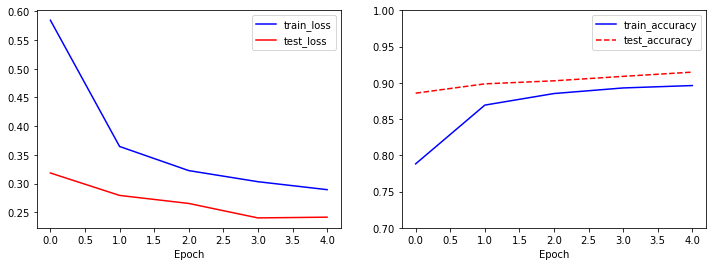

313/313 [==============================] - 5s 15ms/step - loss: 0.2571 - accuracy: 0.9124


[0.25709405541419983, 0.9124000072479248]

In [18]:
# 6.13 VGGNimport matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r-', label='test_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='test_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)et 스타일의 Fashion MNIST 분류 컨볼루션 신경망 모델 학습



### 6.4.2) 이미지 추가( Image Augmentation )   
    - 주된 방식은 뒤집기, 회전, 기울이기,확대 축소, 평행이동 등..

In [19]:
import numpy as np

In [20]:
aa = np.array([10,20,30])
aa

array([10, 20, 30])

In [21]:
np.tile(aa,(2,4))

array([[10, 20, 30, 10, 20, 30, 10, 20, 30, 10, 20, 30],
       [10, 20, 30, 10, 20, 30, 10, 20, 30, 10, 20, 30]])

In [22]:
# ImageDataGenerator 불러오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


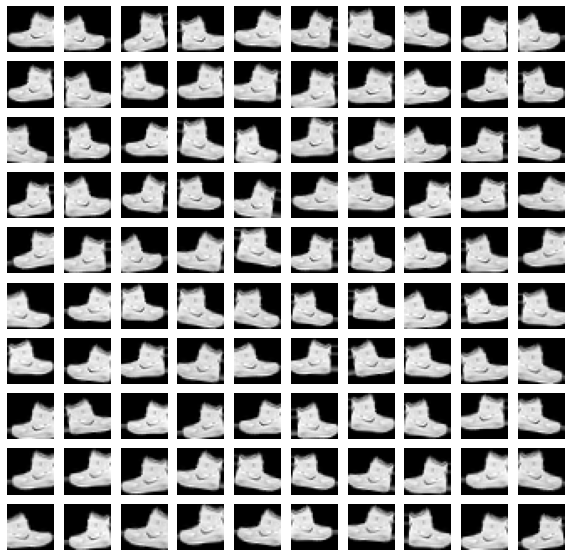

In [23]:
# 6.14 Image Augmentation 데이터 표시
image_generator = ImageDataGenerator(
    rotation_range=10, # 10개를 돌릴거다
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5, #그림의 밝기
    horizontal_flip=True, # 좌우 대칭
    vertical_flip=False #위아래 대칭 
    
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1), # 첫번째 이미지에 대해서 100장을 만들어보자 / (=100,28,28,1)
                              np.zeros(augment_size),
                              batch_size=100,
                              shuffle=False,    
                             ).next()[0] 

# 새롭게 생성된 이미지 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [24]:
# 6.15 Image Augmentation
image_generator = ImageDataGenerator(
    rotation_range=10, # 10개를 돌릴거다
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.5, #그림의 밝기
    horizontal_flip=True, # 좌우 대칭
    vertical_flip=False #위아래 대칭 
    
)


# 훈련 데이터의 50%인 약 3만장 세팅
augment_size = 30000

# 변형할 3만장의 대상 랜덤 선택
randidx = np.random.randint(train_X.shape[0], size=augment_size)


x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, # 첫번째 이미지에 대해서 100장을 만들어보자 / (=100,28,28,1)
                              np.zeros(augment_size),
                              batch_size=augment_size,
                              shuffle=False).next()[0]

                                  

# 원래 데이터인 x_train 에 Image Augmentation 된 x_augmented 를 추가합니다.
# pandas의 concate와 유사함..
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)


(90000, 28, 28, 1)


Epoch 1/5
2110/2110 [==============================] - 167s 79ms/step - loss: 0.5816 - accuracy: 0.7888 - val_loss: 0.5600 - val_accuracy: 0.7812
Epoch 2/5
2110/2110 [==============================] - 166s 79ms/step - loss: 0.3829 - accuracy: 0.8624 - val_loss: 0.4648 - val_accuracy: 0.8231
Epoch 3/5
2110/2110 [==============================] - 166s 79ms/step - loss: 0.3425 - accuracy: 0.8771 - val_loss: 0.4533 - val_accuracy: 0.8275
Epoch 4/5
2110/2110 [==============================] - 167s 79ms/step - loss: 0.3200 - accuracy: 0.8856 - val_loss: 0.4289 - val_accuracy: 0.8408
Epoch 5/5
2110/2110 [==============================] - 166s 79ms/step - loss: 0.3087 - accuracy: 0.8886 - val_loss: 0.4113 - val_accuracy: 0.8499


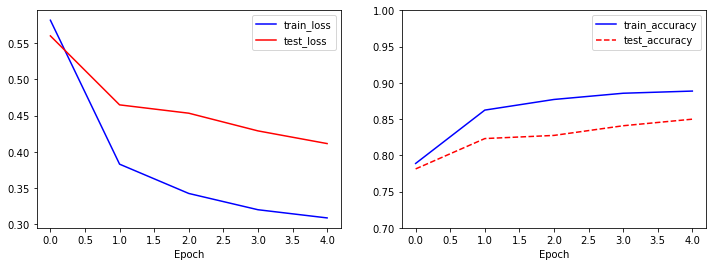

313/313 [==============================] - 5s 15ms/step - loss: 0.2318 - accuracy: 0.9171


[0.23180241882801056, 0.9171000123023987]

In [25]:
# 6.16 VGGNet style 네트워크 + Image Augmentation 학습
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),    
    tf.keras.layers.BatchNormalization(), # conv한 값을 정규화 해주는 과정!! 
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(), # conv한 값을 정규화 해주는 과정!! 
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(), # conv한 값을 정규화 해주는 과정!! 
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Conv2D(kernel_size = (3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(), # conv한 값을 정규화 해주는 과정!! 
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=5, validation_split=0.25)


import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r-', label='test_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label='train_accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label='test_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)

앞의 두 결과에 대한 비교
<img src="img/img_24.png">
<img src="img/img_25.png">